In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
import numpy as np

In [2]:
raw_permits = pd.read_csv('../data/Residential_Short_Term_Rental_Permits.csv')

In [4]:
raw_permits

,Permit #,Applicant,Contact,Permit Subtype Description,Permit Status,Parcel,Date Entered,Date Issued,Expiration Date,Address,...,Permit Owner Addr. 2,Permit Owner Addr. 3,Permit Owner City,Permit Owner State,Permit Owner ZIP,Permit Type,Permit Subtype,Council District,Census Tract,Mapped Location
0,2022052402,Avery Owner 305 LLC,Stay Local Nashville,Short Term Rental � Multifamily,ISSUED,061030E30100CO,8/3/2022 0:00,8/10/2022 0:00,8/10/2023 0:00,4810 GALLATIN PIKE 305,...,3848 Hutson Ave,NaN,Nashville,TN,37216,CASR,CAZ10A003,7.0,37011100,"4810 GALLATIN PIKE 305\nNASHVILLE, TN 37216\n(..."
1,2022028676,"WOLF, BRIAN & ANNA MECHLING","WOLF, BRIAN & ANNA MECHLING",Short Term Rental � Multifamily,ISSUED,091024Y30300CO,4/29/2022 0:00,6/3/2022 0:00,6/3/2024 0:00,5403 CENTENNIAL BLVD 303,...,3609 CALDWELL CT,NaN,NASHVILLE,TN,37204,CASR,CAZ10A003,20.0,37013300,"5403 CENTENNIAL BLVD 303\nNASHVILLE, TN 37209\..."
2,201526366,"Uhl, Thomas W. & Juanita M.",Nieves Uhl,Short Term Rental - Non-Owner Occupied,ISSUED,7301018000,6/24/2015 0:00,6/24/2015 0:00,6/24/2024 0:00,2404 MILTON DR,...,5 Caminito De Montoya,NaN,Santa Fe,NM,87504,CASR,CAZ10A002,7.0,37011500,"2404 MILTON DR\nNASHVILLE, TN 37216\n(36.21023..."
3,201528484,"Schoenbrodt, Christa M.","Schoenbrodt, Christa M.",Short Term Rental - Owner Occupied,ISSUED,10408036300,7/7/2015 0:00,7/7/2015 0:00,7/7/2023 0:00,1709 VILLA PL,...,1709 VILLA PL,NaN,NASHVILLE,TN,37212,CASR,CAZ10A001,17.0,37016300,"1709 VILLA PL\nNASHVILLE, TN 37212\n(36.137262..."
4,2021041773,"BLAIN, DONNA L.",149 Bonita Parkway,Short Term Rental � Multifamily,ISSUED,092100M01700CO,7/1/2021 0:00,8/10/2021 0:00,8/10/2023 0:00,501 27TH AVE N 1,...,101 Affirmed Dr,NaN,Hendersonville,TN,37075,CASR,CAZ10A003,21.0,37014300,"501 27TH AVE N 1\nNASHVILLE, TN 37209\n(36.156..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14459,2021051022,"PINE STREET FLATS, LLC",1055 Pine St Apt 544,Short Term Rental � Multifamily,ISSUED,093130L00300CO,8/10/2021 0:00,9/2/2021 0:00,9/2/2023 0:00,1055 PINE ST 527,...,NaN,NaN,NASHVILLE,TN,37203,CASR,CAZ10A003,19.0,37019500,"1055 PINE ST 527\nNASHVILLE, TN 37203\n(36.152..."
14460,2018010900,"KING, CHERYL M.","KING, CHERYL M.",Short Term Rental - Non-Owner Occupied,EXPIRED,072090T00100CO,2/27/2018 0:00,3/5/2018 0:00,3/5/2019 0:00,941A SPAIN AVE,...,941 A SPAIN AVE,NaN,NASHVILLE,TN,37216,CASR,CAZ10A002,5.0,37011400,"941A SPAIN AVE\nNASHVILLE, TN 37216\n(36.20106..."
14461,2019044356,"NIC Velocity, LLC",The Guild,Short Term Rental � Multifamily,EXPIRED,093130B00200CO,7/25/2019 0:00,8/5/2019 0:00,8/5/2021 0:00,320 11TH AVE S 342,...,1033 DEMONBREUN ST STE 630,NaN,NASHVILLE,TN,37203,CASR,CAZ10A003,19.0,37019500,"320 11TH AVE S 342\nNASHVILLE, TN 37203\n(36.1..."
14462,2018049619,Benjamin Van Hoesen,Benjamin Van Hoesen,Short Term Rental - Owner Occupied,CANCELLED,8205004300,8/20/2018 0:00,9/7/2018 0:00,9/7/2020 0:00,1619 5TH AVE N,...,1619 5TH AV N,NaN,NASHVILLE,TN,37219,CASR,CAZ10A001,19.0,37019400,"1619 5TH AVE N\nNASHVILLE, TN 37208\n(36.18162..."


In [5]:
raw_metro = pd.read_csv('../data/Metro_Nashville_Police_Department_Incidents.csv')

In [6]:
raw_metro

,Primary Key,Incident Number,Report Type,Report Type Description,Incident Status Code,Incident Status Description,Investigation Status,Incident Occurred,Incident Reported,Incident Location,...,Weapon Description,Victim Number,Domestic Related,Victim Type,Victim Description,Victim Gender,Victim Race,Victim Ethnicity,Victim County Resident,Mapped Location
0,20190496213_11,20190496213,D,DISPATCHED,U,UNFOUNDED,Closed,7/1/2019 17:31,7/1/2019 18:17,2410 2410,...,NONE,1,True,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.696 36.218)
1,20180290646_11,20180290646,D,DISPATCHED,A,CLEARED BY ARREST,Closed,3/31/2018 12:21,3/31/2018 19:41,5824 5824,...,NONE,1,False,B,BUSINESS,NaN,NaN,NaN,NaN,POINT (-86.713 36.042)
2,20200243837_11,20200243837,D,DISPATCHED,U,UNFOUNDED,Closed,4/6/2020 11:15,4/6/2020 13:11,3144 3144,...,NONE,1,False,G,GOVERNMENT,NaN,NaN,NaN,NaN,POINT (-86.759 36.232)
3,20170471747_11,20170471747,D,DISPATCHED,U,UNFOUNDED,Closed,5/29/2017 2:33,5/29/2017 4:27,1714 1714,...,NONE,1,False,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.907 36.086)
4,20171099391_21,20171099391,D,DISPATCHED,A,CLEARED BY ARREST,Closed,12/16/2017 18:30,12/16/2017 22:44,1101 1101,...,PERSONAL (HANDS),1,True,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,POINT (-86.586 36.178)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892934,20220559925_11,20220559925,D,DISPATCHED,O,OPEN,Open,11/6/2022 2:00,11/6/2022 5:10,MARGO,...,HANDGUN,1,True,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,POINT (-86.7 36.08)
892935,20220657438_11,20220657438,D,DISPATCHED,U,UNFOUNDED,Closed,12/28/2022 12:20,12/28/2022 13:35,107 107,...,NONE,1,True,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.724 36.267)
892936,20220657558_11,20220657558,T,NaN,O,OPEN,Open,12/22/2022 12:00,12/28/2022 14:09,HAYWOOD LN,...,NONE,1,False,B,BUSINESS,NaN,NaN,NaN,NaN,POINT (-86.69 36.07)
892937,20220551034_11,20220551034,D,DISPATCHED,O,OPEN,Open,11/1/2022 13:00,11/1/2022 16:21,MUSIC CITY CIR,...,NONE,1,False,B,BUSINESS,NaN,NaN,NaN,NaN,POINT (-86.7 36.22)


In [96]:
raw_metro['Incident Occurred'] = pd.to_datetime(raw_metro['Incident Occurred'])

In [11]:
target_metro = raw_metro[raw_metro['Incident Occurred'] >= '2016-01-01']

In [45]:
raw_metro['ZIP Code']

0         37214.0
1         37013.0
2         37207.0
3         37205.0
4         37076.0
           ...   
892934        NaN
892935    37115.0
892936        NaN
892937        NaN
892938        NaN
Name: ZIP Code, Length: 892939, dtype: float64

In [12]:
top_10zone=target_metro.value_counts('Zone').head(10)
top_10zone

Zone
313.0    15373
515.0    15370
211.0    14448
223.0    14286
715.0    13929
721.0    13358
621.0    13319
817.0    13170
321.0    13100
511.0    12998
dtype: int64

In [88]:
crime10_zip=raw_metro['ZIP Code'].value_counts().head(10)
crime10_zip

37207.0    49997
37211.0    44391
37013.0    43495
37115.0    40067
37203.0    28365
37208.0    28057
37210.0    27100
37206.0    24893
37209.0    24578
37217.0    24038
Name: ZIP Code, dtype: int64

In [13]:
raw_permits['Date Issued']=pd.to_datetime(raw_permits['Date Issued'])

In [14]:
filtered_permits = raw_permits[raw_permits['Date Issued'] >= '2016-01-01']

In [15]:
zip_permits = filtered_permits.value_counts('ZIP')
zip_permits.head(10)

ZIP
37203    2597
37206    1275
37208    1135
37212    1006
37207     992
37209     902
37216     670
37210     533
37201     520
37204     360
dtype: int64

In [24]:
zip_permits10= zip_permits.head(10)
zip_permits10

ZIP
37203    2597
37206    1275
37208    1135
37212    1006
37207     992
37209     902
37216     670
37210     533
37201     520
37204     360
dtype: int64

In [28]:
zip_permits10,crime10_zip

(ZIP
 37203    2597
 37206    1275
 37208    1135
 37212    1006
 37207     992
 37209     902
 37216     670
 37210     533
 37201     520
 37204     360
 dtype: int64,
 37207.0    49997
 37211.0    44391
 37013.0    43495
 37115.0    40067
 37203.0    28365
 37208.0    28057
 37210.0    27100
 37206.0    24893
 37209.0    24578
 37217.0    24038
 Name: ZIP Code, dtype: int64)

In [47]:
import pandas as pd

s1 = pd.Series([1, 2, 3])
s1.name = 'old'

s2 = pd.Series([4, 5, 6])
s2.name = 'new'

result = pd.merge(s1, s2, left_index=True, right_index=True)
result

,old,new
0,1,4
1,2,5
2,3,6


zips10=pd.Series('zip_permits10')
zips10.name='old'

crimezip=pd.Series('crime10_zip')
crimezip.name='new'
zip_10_combo = pd.merge(zips10, crimezip, left_on='ZIP', right_on='ZIP Code')
zip_10_combo

In [74]:
common_zips=37209,37206,37210,37208,37203,37207
crime_values(dict)= 
'37209':'24578', '37206':'24893', '37210':'27100', '37208':'28057','37203':'28365', '37207':'49997'
rental_values= '377209':'902', '37206':'1275', '37210':'533', '37208':'1135', '37203':'2597', '37207':'992'
                        
print(common_zips,crime_values,rental_values)

SyntaxError: cannot assign to function call (3142373376.py, line 2)

In [49]:
zip10_permits=zip_permits.head(10)
zip10_permits

ZIP
37203    2597
37206    1275
37208    1135
37212    1006
37207     992
37209     902
37216     670
37210     533
37201     520
37204     360
dtype: int64

37207.0    49997
37211.0    44391
37013.0    43495
37115.0    40067
37203.0    28365
37208.0    28057
37210.0    27100
37206.0    24893
37209.0    24578
37217.0    24038

In [53]:
filtered_permits = raw_permits[raw_permits['Date Issued'] >= '2016-01-01']

In [56]:
raw_permits['Date Issued'] = pd.to_datetime(raw_permits['Date Issued'])
raw_permits['Year'] = raw_permits['Date Issued'].dt.year
counts_by_year = raw_permits['Year'].value_counts()
print(counts_by_year)

2018.0    2181
2022.0    2105
2019.0    1992
2017.0    1678
2016.0    1321
2021.0    1319
2015.0    1174
2020.0     925
2023.0     497
Name: Year, dtype: int64


In [46]:
#zip_10_combo = pd.merge(zip_permits10.rename('new'), crime10_zip.rename('old'), left_on='ZIP', rightb_on='ZIP Code', how='inner')

In [57]:
rent_year_zip= zip10_permits,counts_by_year
rent_year_zip

(ZIP
 37203    2597
 37206    1275
 37208    1135
 37212    1006
 37207     992
 37209     902
 37216     670
 37210     533
 37201     520
 37204     360
 dtype: int64,
 2018.0    2181
 2022.0    2105
 2019.0    1992
 2017.0    1678
 2016.0    1321
 2021.0    1319
 2015.0    1174
 2020.0     925
 2023.0     497
 Name: Year, dtype: int64)

In [94]:
rent_year_zip = zip10_permits, counts_by_year
rent_year_zip.columns = ['ZIP Code', 'Year']


rent_year_zip

AttributeError: 'tuple' object has no attribute 'columns'

In [ ]:
zip_permits10 =pd.concat([])

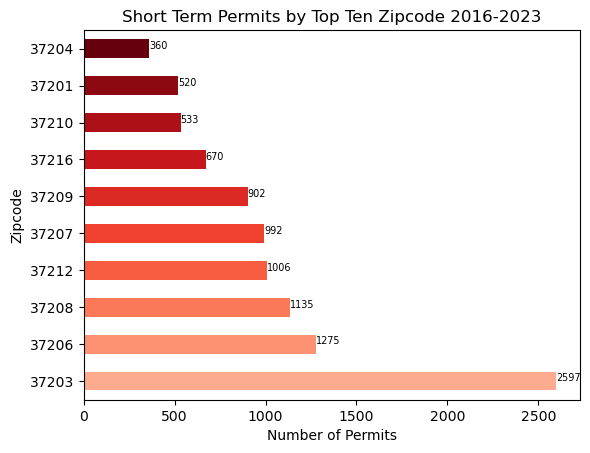

In [84]:
reds = plt.cm.Reds(np.linspace(0.3, 1, 10))
zip10_permits.plot(kind='barh', color=reds)

plt.title('Short Term Permits by Top Ten Zipcode 2016-2023')
plt.xlabel('Number of Permits')
plt.ylabel('Zipcode')

for index, data in enumerate(zip10_permits):
    plt.annotate(f"{data}", xy=(data, index), ha='left', fontsize=7)

plt.yticks(rotation=0)
plt.show()

In [90]:
crime10_zip

37207.0    49997
37211.0    44391
37013.0    43495
37115.0    40067
37203.0    28365
37208.0    28057
37210.0    27100
37206.0    24893
37209.0    24578
37217.0    24038
Name: ZIP Code, dtype: int64

In [91]:
crime10_zip=raw_metro['ZIP Code'].value_counts().head(10)
crime10_zip

37207.0    49997
37211.0    44391
37013.0    43495
37115.0    40067
37203.0    28365
37208.0    28057
37210.0    27100
37206.0    24893
37209.0    24578
37217.0    24038
Name: ZIP Code, dtype: int64

In [97]:
raw_metro['Year'] = raw_metro['Incident Occurred'].dt.year

In [120]:
crime10_zip = raw_metro['ZIP Code'], raw_metro['Year'],raw_metro['Incident Number'].value_counts()
crime10_zip

(0         37214.0
 1         37013.0
 2         37207.0
 3         37205.0
 4         37076.0
            ...   
 892934        NaN
 892935    37115.0
 892936        NaN
 892937        NaN
 892938        NaN
 Name: ZIP Code, Length: 892939, dtype: float64,
 0         2019
 1         2018
 2         2020
 3         2017
 4         2017
           ... 
 892934    2022
 892935    2022
 892936    2022
 892937    2022
 892938    2022
 Name: Year, Length: 892939, dtype: int64,
 20220118698    74
 20210653157    63
 20220128190    42
 20220527030    40
 20190872419    34
                ..
 20200128461     1
 20200537301     1
 20230028993     1
 20190481291     1
 20220551034     1
 Name: Incident Number, Length: 739176, dtype: int64)

In [125]:
crime10_zip = pd.DataFrame({
    'Zip Code': raw_metro['ZIP Code'],
    'Year': raw_metro['Year'],
    'Incident Number': raw_metro['Incident Number']
})
crime10_zip.head(20)

,Zip Code,Year,Incident Number
0,37214.0,2019,20190496213
1,37013.0,2018,20180290646
2,37207.0,2020,20200243837
3,37205.0,2017,20170471747
4,37076.0,2017,20171099391
5,37201.0,2019,20190792147
6,37207.0,2020,20200019888
7,37208.0,2017,20170069535
8,37013.0,2017,20170051465
9,NaN,2019,20200532326


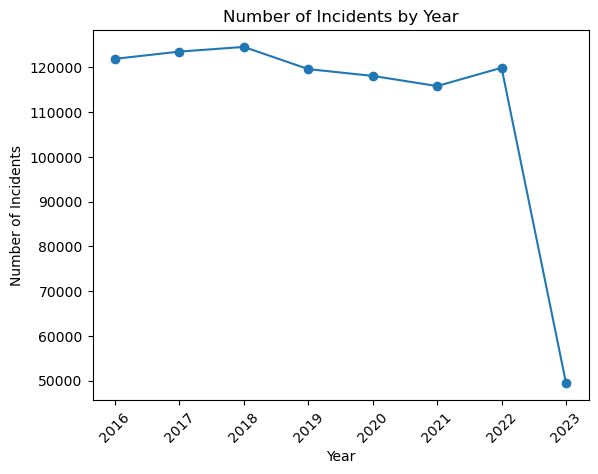

In [127]:
crime10_zip = pd.DataFrame({
    'Zip Code': raw_metro['ZIP Code'],
    'Year': raw_metro['Year'],
    'Incident Number': raw_metro['Incident Number']
})

incident_counts_by_year = crime10_zip.groupby('Year')['Incident Number'].count()

plt.plot(incident_counts_by_year.index, incident_counts_by_year.values, marker='o')

plt.title('Number of Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')

plt.xticks(rotation=45)
plt.show()

In [131]:
desired_zip_codes = [37209, 37206, 37210, 37208, 37203, 37207]
filtered_data = crime10_zip[crime10_zip['Zip Code'].isin(desired_zip_codes)]

# Print the resulting filtered DataFrame
print(filtered_data)

        Zip Code  Year  Incident Number
2        37207.0  2020      20200243837
6        37207.0  2020      20200019888
7        37208.0  2017      20170069535
11       37206.0  2016      20160857787
16       37203.0  2016      20160707592
...          ...   ...              ...
892880   37208.0  2022      20220637748
892887   37203.0  2022      20220533482
892903   37208.0  2022      20220557614
892913   37209.0  2022      20220540523
892924   37203.0  2022      20220591531

[182990 rows x 3 columns]


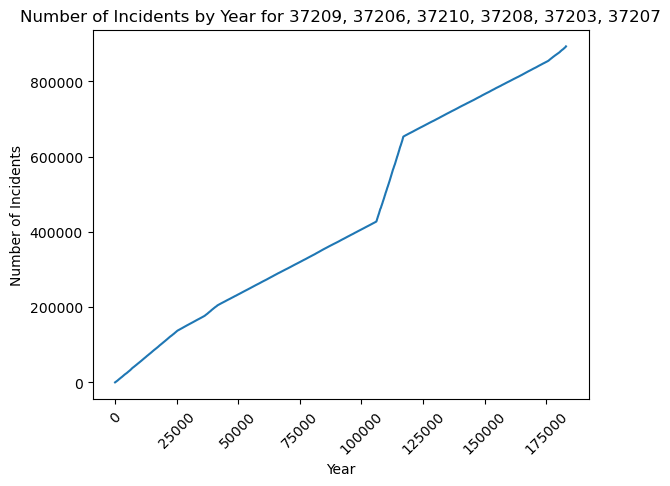

In [134]:



plt.plot(filtered_data.index)

plt.title('Number of Incidents by Year for 37209, 37206, 37210, 37208, 37203, 37207')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')

plt.xticks(rotation=45)
plt.show()

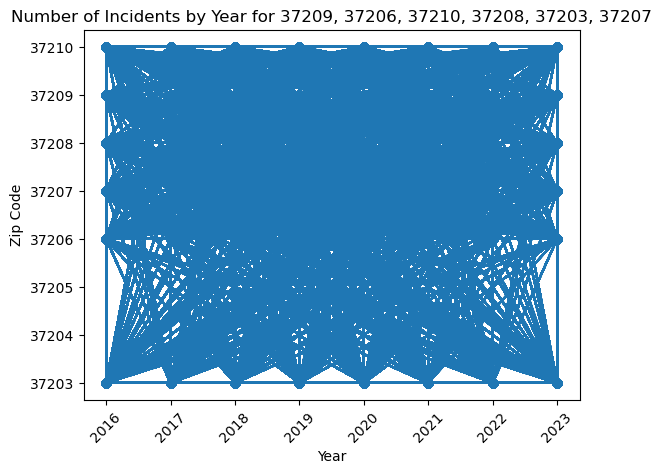

In [135]:
plt.plot(filtered_data['Year'], filtered_data['Zip Code'], marker='o')

plt.title('Number of Incidents by Year for 37209, 37206, 37210, 37208, 37203, 37207')
plt.xlabel('Year')
plt.ylabel('Zip Code')

plt.xticks(rotation=45)
plt.show()

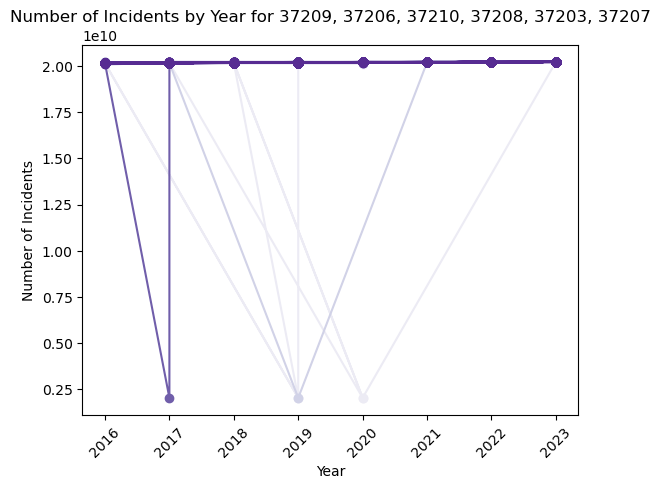

In [138]:
# Define a color palette
zip_codes = filtered_data['Zip Code'].unique()
colors = sns.color_palette("Purples", len(zip_codes))

# Plot the lines for each zip code
for i, zip_code in enumerate(zip_codes):
    data = filtered_data[filtered_data['Zip Code'] == zip_code]
    plt.plot(data['Year'], data['Incident Number'], marker='o', color=colors[i])

plt.title('Number of Incidents by Year for 37209, 37206, 37210, 37208, 37203, 37207')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')

plt.xticks(rotation=45)
plt.show()